In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
patients = pd.read_csv('breast-cancer.csv')
patients = patients.drop(columns='ID')
patients['Distance'] = ""
patients

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
0,5,1,1,1,2,1,3,1,1,0,
1,5,4,4,5,7,10,3,2,1,0,
2,3,1,1,1,2,2,3,1,1,0,
3,6,8,8,1,3,4,3,7,1,0,
4,4,1,1,3,2,1,3,1,1,0,
...,...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0,
679,2,1,1,1,2,1,1,1,1,0,
680,5,10,10,3,7,3,8,10,2,1,
681,4,8,6,4,3,4,10,6,1,1,


In [5]:
def select_testing_training(table, nrows):
    """Return a tuple with indexes for Training and Testing Sets from TABLE with NROWS."""
    testing_index = []
    training_index = table.sample(nrows).index
    for index in table.index:
        if index not in training_index:
            testing_index.append(index)
    testing_index = pd.Index(testing_index)
    return testing_index, training_index

In [6]:
def distance(row1, row2):
    """Return the distance between two points (represented as arrays)"""
    return np.sqrt(sum((row1 - row2) ** 2))

In [7]:
test_index, train_index = select_testing_training(patients, 600)

train_table = patients.iloc[train_index]
test_table = patients.iloc[test_index]

In [8]:
# Select first row of Testing Set as an example
# Do not include Class or Distance Row information
example = np.array(test_table.iloc[0])[:-2]
example

array([5, 4, 4, 5, 7, 10, 3, 2, 1], dtype=object)

In [9]:
def distances(table, example):
    "Return an array with the distances of each row in TABLE to EXAMPLE."
    dists = np.array([])
    train_rows, train_cols = table.shape
    for row in np.arange(train_rows):
        dist = distance(np.array(table.iloc[row])[:-2], example)
        dists = np.append(dists, dist)
    return dists

In [10]:
def get_knn(table, example, k):
    """Return the K nn to EXAMPLE in the training TABLE"""
    table['Distance'] = distances(table, example)
    knn = table.sort_values(by='Distance').head(k)
    return knn

In [11]:
knn = get_knn(train_table, example, 5)
knn

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
319,5,4,6,6,4,10,4,3,1,1,4.000000
303,5,5,5,2,5,10,4,3,1,1,4.123106
151,5,5,5,6,3,10,3,1,1,1,4.472136
142,3,4,5,2,6,8,4,1,1,1,4.582576
109,8,6,4,3,5,9,3,1,1,1,4.795832


In [12]:
def majority_class(train_table, example , k):
    """Return the Class with the majority number in knn for Training TABLE
       ,EXAMPLE and K nn."""
    knn = get_knn(train_table, example, k)
    knn_grouped = knn.groupby(by='Class').aggregate({'Class' : 'count'})
    knn_grouped.columns = ['Count']
    major_class = knn_grouped.sort_values(by='Count', ascending=False).index[0]
    return major_class

In [13]:
majority_class(train_table, example, 5)

1

In [14]:
example

array([5, 4, 4, 5, 7, 10, 3, 2, 1], dtype=object)

In [15]:
majority_class(train_table, example, 10)

1

In [16]:
test_table.iloc[0]['Class']

0

In [17]:
test_index

Int64Index([  1,   3,  23,  53,  55,  58,  90, 103, 126, 132, 140, 144, 148,
            153, 166, 170, 173, 175, 183, 184, 197, 199, 213, 220, 221, 223,
            231, 236, 254, 262, 275, 279, 280, 285, 286, 287, 290, 292, 308,
            313, 317, 325, 327, 328, 329, 341, 351, 353, 356, 357, 360, 365,
            371, 376, 395, 396, 419, 422, 428, 442, 472, 478, 491, 492, 493,
            504, 513, 515, 520, 533, 558, 569, 581, 586, 594, 607, 614, 633,
            636, 651, 657, 658, 672],
           dtype='int64')

In [18]:
patients.iloc[[1, 4]]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
1,5,4,4,5,7,10,3,2,1,0,
4,4,1,1,3,2,1,3,1,1,0,


In [19]:
knn

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
319,5,4,6,6,4,10,4,3,1,1,4.000000
303,5,5,5,2,5,10,4,3,1,1,4.123106
151,5,5,5,6,3,10,3,1,1,1,4.472136
142,3,4,5,2,6,8,4,1,1,1,4.582576
109,8,6,4,3,5,9,3,1,1,1,4.795832


In [20]:
example

array([5, 4, 4, 5, 7, 10, 3, 2, 1], dtype=object)

In [21]:
test_index

Int64Index([  1,   3,  23,  53,  55,  58,  90, 103, 126, 132, 140, 144, 148,
            153, 166, 170, 173, 175, 183, 184, 197, 199, 213, 220, 221, 223,
            231, 236, 254, 262, 275, 279, 280, 285, 286, 287, 290, 292, 308,
            313, 317, 325, 327, 328, 329, 341, 351, 353, 356, 357, 360, 365,
            371, 376, 395, 396, 419, 422, 428, 442, 472, 478, 491, 492, 493,
            504, 513, 515, 520, 533, 558, 569, 581, 586, 594, 607, 614, 633,
            636, 651, 657, 658, 672],
           dtype='int64')

In [22]:
patients.iloc[[6]]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
6,1,1,1,1,2,10,3,1,1,0,


In [23]:
def gen_class_tables(orintable, nrows):
    "Return Training and Testing Sets from ORINTABLE with NROWS for Training."
    test_index, train_index = select_testing_training(orintable, nrows)
    train_table = orintable.iloc[train_index]
    test_table = orintable.iloc[test_index]
    return train_table, test_table

In [24]:
train_table , test_table = gen_class_tables(patients, 650)

In [25]:
def evaluate_classifier(train_table, test_table, k):
    """Return an array with the classified class for each row in TEST_TABLE."""
    num_rows_test, num_columns_test = test_table.shape
    num_rows_train, num_columns_train = train_table.shape
    test_class = []
    for row in np.arange(num_rows_test):
        example = np.array(test_table.iloc[row])[:-2]
        atest = majority_class(train_table, example, k)
        test_class.append(atest)
    return np.array(test_class)

In [26]:
def evaluate_accuracy(train_table, test_table, k):
    """Return the accurary of the classifier for TRAINING and TESTING Sets and K nn."""
    test_array = evaluate_classifier(train_table, test_table, k)
    orin_test_array = np.array(test_table['Class'])
    num_correct = 0
    for i in np.arange(len(test_array)):
        if test_array[i] == orin_test_array[i]:
            num_correct = num_correct + 1
    return num_correct / len(test_array)

In [27]:
for k in np.arange(1, 10, 1):
    print(k, evaluate_accuracy(train_table, test_table, k))

1 0.9696969696969697
2 0.9090909090909091
3 0.9090909090909091
4 0.9090909090909091
5 0.9090909090909091
6 0.9090909090909091
7 0.9090909090909091
8 0.9090909090909091
9 0.9090909090909091


In [28]:
ckd = pd.read_csv('ckd.csv')
ckd = ckd.rename(columns={'Blood Glucose Random':'Glucose'})
ckd['Distance'] = ""
ckd.head(3)

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,Distance
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,1,
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,12100,3.7,yes,yes,no,poor,no,yes,1,
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,4500,3.8,yes,yes,no,poor,yes,no,1,


In [29]:
ckd_hem_glu_0 = ckd.groupby(by='Class').get_group((0))
ckd_hem_glu_1 = ckd.groupby(by='Class').get_group((1))

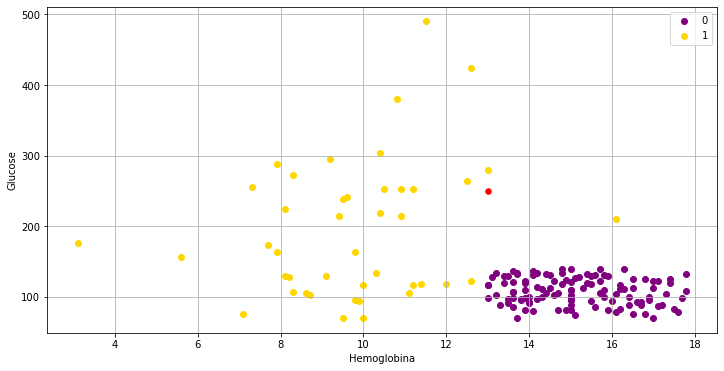

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(ckd_hem_glu_0['Hemoglobin'], ckd_hem_glu_0['Glucose'], c='purple', label='0')
ax.scatter(ckd_hem_glu_1['Hemoglobin'], ckd_hem_glu_1['Glucose'], c='gold', label='1')
ax.set_xlabel('Hemoglobina')
ax.set_ylabel('Glucose')
ax.legend()
ax.grid()
ax.scatter(13, 250, color='red', s=30);

In [31]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Glucose                  158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [32]:
kidney = ckd[['Hemoglobin', 'Glucose', 'Class', 'Distance']]
kidney_class_distance = ckd[['Class', 'Distance']]
kidney.head(5)

,Hemoglobin,Glucose,Class,Distance
0,11.2,117,1,
1,9.5,70,1,
2,10.8,380,1,
3,5.6,157,1,
4,7.7,173,1,


In [33]:
example = np.array([13, 250])

In [34]:
get_knn(kidney, example, 5)

,Hemoglobin,Glucose,Class,Distance
32,11.2,252,1,2.690725
34,10.9,253,1,3.661967
8,10.5,253,1,3.905125
33,7.3,255,1,7.582216
38,9.6,241,1,9.620811


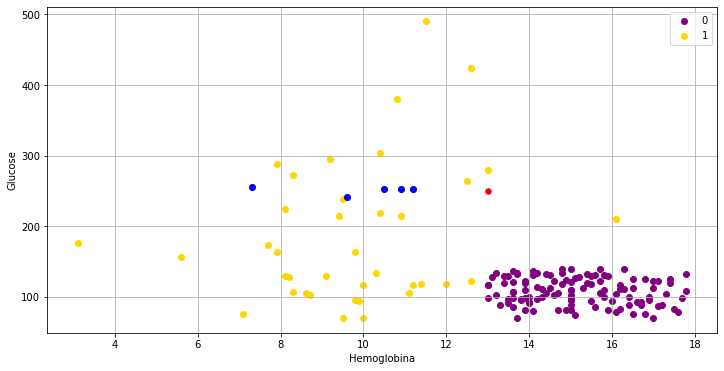

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(ckd_hem_glu_0['Hemoglobin'], ckd_hem_glu_0['Glucose'], c='purple', label='0')
ax.scatter(ckd_hem_glu_1['Hemoglobin'], ckd_hem_glu_1['Glucose'], c='gold', label='1')
ax.set_xlabel('Hemoglobina')
ax.set_ylabel('Glucose')
ax.legend()
ax.grid()
ax.scatter(13, 250, color='red', s=30)
closest = get_knn(kidney, example, 5)
for row in np.arange(0, 5, 1):
    ax.scatter(np.array(closest.iloc[row][0]), np.array(closest.iloc[row][1]), c="blue")

In [36]:
def show_closest(two_col_table, example, k):
    """Plot K nn closest to EXAMPLE"""
    fig, ax = plt.subplots(figsize=(12,6))
    two_table_0 = two_col_table.groupby(by='Class').get_group((0))
    two_table_1 = two_col_table.groupby(by='Class').get_group((1))
    ax.scatter(two_table_0.iloc[:, 0], two_table_0.iloc[:, 1], c='purple', label='0')
    ax.scatter(two_table_1.iloc[:, 0], two_table_1.iloc[:, 1], c='gold', label='1')
    ax.legend()
    ax.set_xlabel(two_col_table.columns[0])
    ax.set_ylabel(two_col_table.columns[1])
    ax.grid()
    ax.scatter(example[0], example[1], color='red', s=30)
    closest = get_knn(two_col_table, example, k)
    for row in np.arange(0, k, 1):
        ax.scatter(np.array(closest.iloc[row][0]), np.array(closest.iloc[row][1]), c="blue")

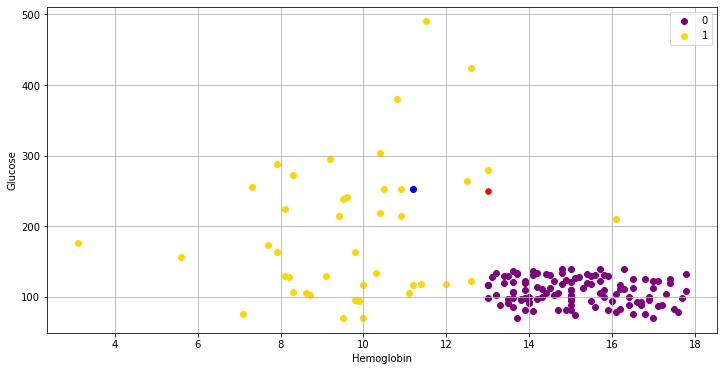

In [37]:
show_closest(kidney, example, 1)

In [38]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)

In [39]:
def standardize(table):
    """Return a TABLE with columns converted to standard units."""
    table_su = pd.DataFrame()
    for label in table.columns[0:2]:
        table_su[label] = standard_units(table[label])
    return table_su

In [40]:
kidney_su = pd.concat([standardize(kidney), kidney_class_distance], axis=1)
kidney_su

,Hemoglobin,Glucose,Class,Distance
0,-0.865744,-0.221549,1,
1,-1.457446,-0.947597,1,
2,-1.004968,3.841231,1,
3,-2.814879,0.396364,1,
4,-2.083954,0.643529,1,
...,...,...,...,...
153,0.700526,0.133751,0,
154,0.978974,-0.870358,0,
155,0.735332,-0.484162,0,
156,0.178436,-0.267893,0,


In [41]:
example = np.array([-0.2, 1.8])

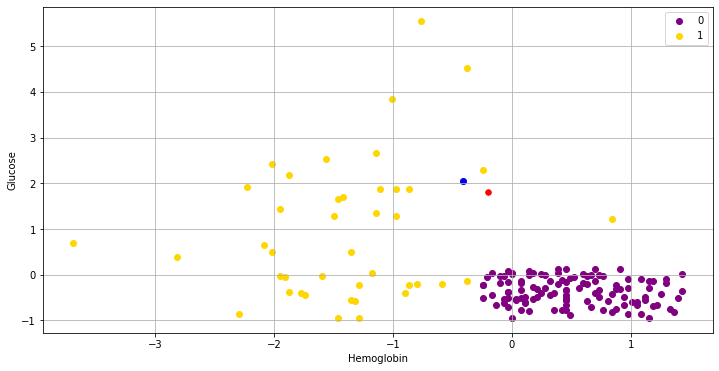

In [42]:
show_closest(kidney_su, example, 1)

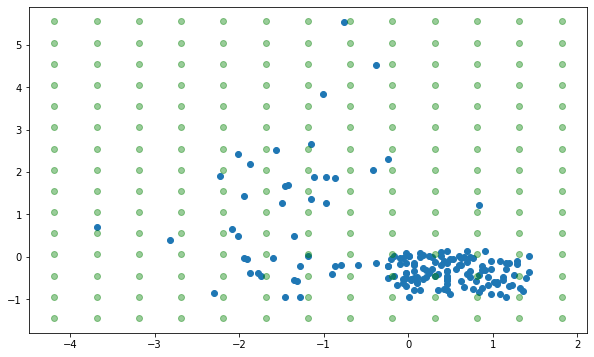

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
x = standard_units(kidney.iloc[:, 0])
y = standard_units(kidney.iloc[:, 1])
ax.scatter(x, y)
x_max = np.max(x) + 0.5
x_min = np.min(x) - 0.5
y_max = np.max(y) + 0.5
y_min = np.min(y) - 0.5
for i in np.arange(x_min, x_max, 0.5):
    for j in np.arange(y_min, y_max, 0.5):
        ax.scatter(i, j, c='green', alpha=0.4)

In [44]:
x_column = np.array([])
y_column = np.array([])
x = standard_units(kidney.iloc[:, 0])
y = standard_units(kidney.iloc[:, 1])
x_max = np.max(x)
x_min = np.min(x)
y_max = np.max(y)
y_min = np.min(y)
for i in np.arange(x_min, x_max, 0.1):
    for j in np.arange(y_min, y_max, 0.1):
        x_column = np.append(x_column, i)
        y_column = np.append(y_column, j)
testing_points = pd.DataFrame({'Hemoglobin': x_column, 'Glocose': y_column, 'Class': "", 'Distance': ""})
testing_points

,Hemoglobin,Glocose,Class,Distance
0,-3.685029,-0.947597,,
1,-3.685029,-0.847597,,
2,-3.685029,-0.747597,,
3,-3.685029,-0.647597,,
4,-3.685029,-0.547597,,
...,...,...,...,...
3375,1.414971,5.052403,,
3376,1.414971,5.152403,,
3377,1.414971,5.252403,,
3378,1.414971,5.352403,,


In [45]:
testing_po

NameError: name 'testing_po' is not defined

In [68]:
test_class = evaluate_classifier(kidney_su, testing_points, 5)

In [69]:
testing_points['Class'] = test_class

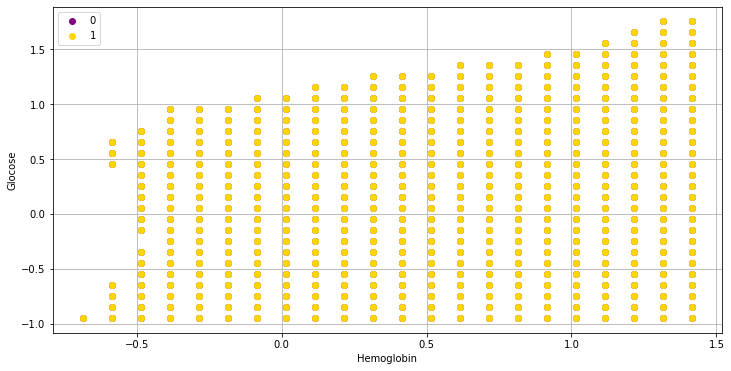

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
testing_points_0 = testing_points.groupby(by='Class').get_group((0))
testing_points_1 = testing_points.groupby(by='Class').get_group((1))
ax.scatter(testing_points_0.iloc[:, 0], testing_points_0.iloc[:, 1], c='purple', label='0')
ax.scatter(testing_points_0.iloc[:, 0], testing_points_0.iloc[:, 1], c='gold', label='1')
ax.legend()
ax.set_xlabel(testing_points_0.columns[0])
ax.set_ylabel(testing_points_0.columns[1])
ax.legend()
ax.grid()